<a href="https://colab.research.google.com/github/PRIX007/Data-Science-Business-Analytics-Tasks-GRIP-2021/blob/main/TASK_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK :For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically
BY PRIYANSHU KUMAWAT

In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


LOAD DATASET

In [ ]:
url = ': https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


ENCODING LABELS


In [ ]:
le = preprocessing.LabelEncoder()
data["labels"]=le.fit_transform(data["Species"])
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [ ]:
data['labels'].unique() # TO CHECK ALL LABEL ARE INTEGER LABEL CODED


In [ ]:
X=data.drop(['Id','Species','labels'],axis=1)
y=data['labels']

SPLITING DATASET TO TEST AND TRAIN 

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

TRAINING MODEL 

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
ytrain_preds=model.predict(X_train)
ytest_preds=model.predict(X_test)
#print(ytrain_preds)
train_score=f1_score(np.array(y_train),ytrain_preds,average="macro")
test_score=f1_score(np.array(y_test),ytest_preds,average="macro")
print(model)
print("The f1-score of training data is {}".format(train_score))
print("The f1-score of test data is {}".format(test_score))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The f1-score of training data is 1.0
The f1-score of test data is 0.9644444444444445


VISUALISATION OF MODEL

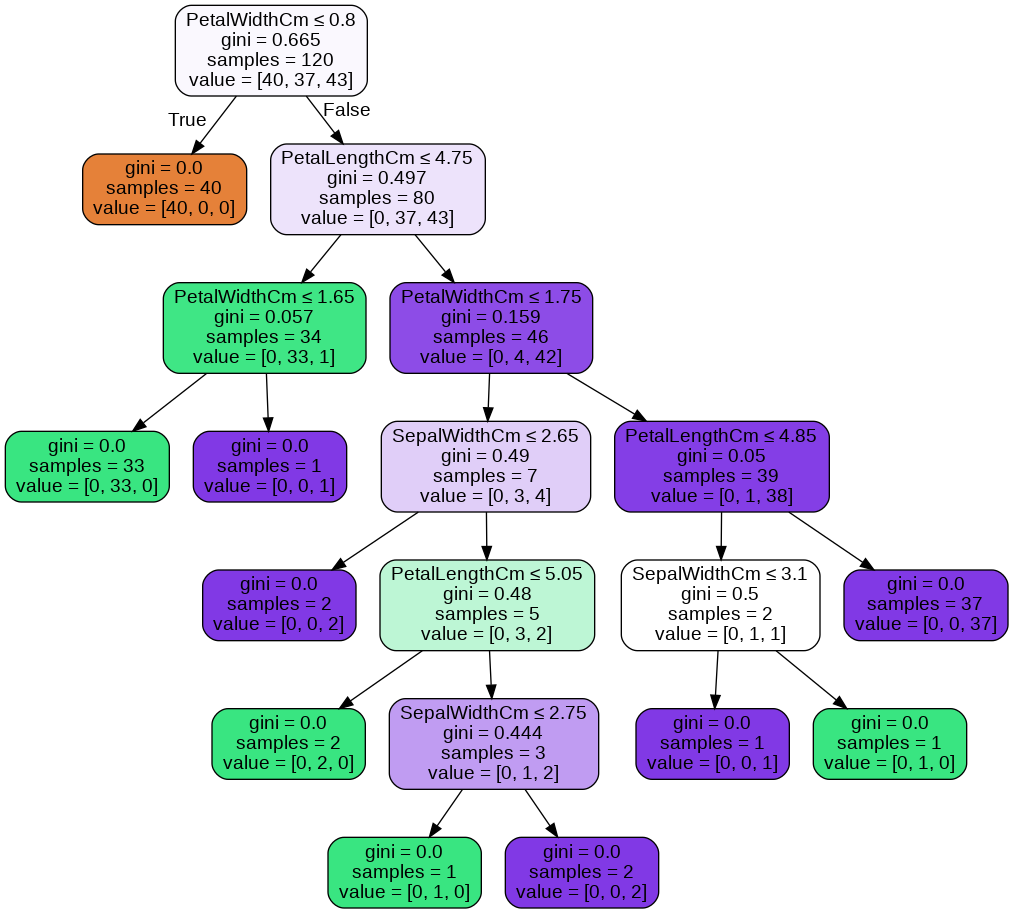

In [ ]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=data.columns[1:-2],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())